# Taller método Runge-Kutta de orden 5
### Herramientas computacionales   /    Daniel Felipe Rojas Paternina   /    Abril 17, 2023

In [2]:
#Librerias 
import numpy as np
import matplotlib.pyplot as plt
import math

In [15]:
#Definición del metodo RK5
def RK5(f,y0,xf,h):
    ''' Metodo RK5 para solución de ecuaciones diferenciales ordinarias.
        La función devuelve una lista de listas cuyo primer elemento es el dominio
        de la solución, y el segundo elemento las respectivas imagenes. Por otra parte,
        los argumentos de la función son:
        f : Función f = dy/dx
        y0: Condición inicial
        xf: Cota superior del dominio
        h : Paso de integración'''
    
    N = int(xf/h)   #Número de pasos 
    X = np.zeros(N) #Dominio
    Y = np.zeros(N) #Imagen
    Y[0] = y0       #Condición inicial   
    X[0] = 0        #Dominio inicial  
    x = 0            
    
    for i in range(0,N-1):
        #Paso en el dominio
        x   += h  
        
        #Coeficientes del metodo RK5
        k1 = f(x, Y[i])
        k2 = f(x + h/4, Y[i] + k1*h/4)
        k3 = f(x + h/4, Y[i] + k1*h/8 + k2*h/8)
        k4 = f(x + h/2, Y[i] - k2*h/2 + k3*h)
        k5 = f(x + 3*h/4,Y[i] + 3*k1*h/16 + 9*k4*h/16)
        k6 = f(x + h, Y[i]-3*k1*h/7 + 2*k2*h/7 + 12*k3*h/7 - 12*k4*h/7 +8*k5*h/7)
        
        #Se adjunta la solución a las listas de dominio e imagen
        Y[i+1]= Y[i] + (h/90)*(7*k1 + 32*k3 + 12*k4 + 32*k5 + 7*k6)
        X[i+1] = x
        
    return X,Y

In [30]:
#Funciones a solucionar
def f1(x,y):
    return x-2*y

def f2(x,y):
    return x**2 - 2*y**0.2

def f3(x,y):
    return x**2 - 2*y**0.4

def f4(x,y):
    return x**2 - 2*y**0.6

def f5(x,y):
    return x**2 - 2*y**0.8

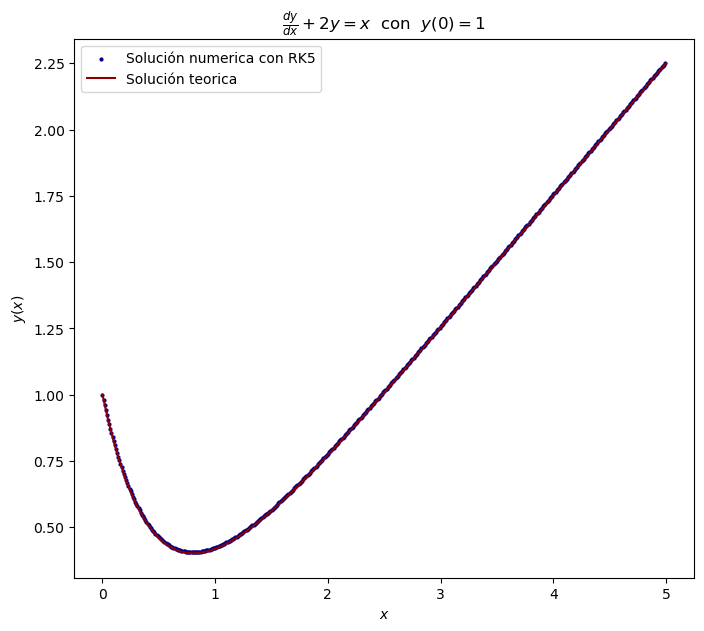

In [28]:
##Punto I
#Solución teorica
X_teo1 = np.linspace(0,5,100)
Y_teo1 = (2*X_teo1 + 5*np.exp(-2*X_teo1) - 1)/4
#Solución numerica
Solution1 = RK5(f1,1,5,0.01)
#Plot de las soluciones
plt.figure(figsize=(8,7))
plt.scatter(Solution1[0],Solution1[1],color = "darkblue", s = 4 ,label = "Solución numerica con RK5")
plt.plot(X_teo1,Y_teo1,color = "darkred", label = "Solución teorica")
plt.xlabel(r"$x$")
plt.ylabel(r"$y\left(x\right)$")
plt.title(r"$\frac{dy}{dx}+2y = x$  con  $y(0)=1$")
plt.legend()
plt.show()

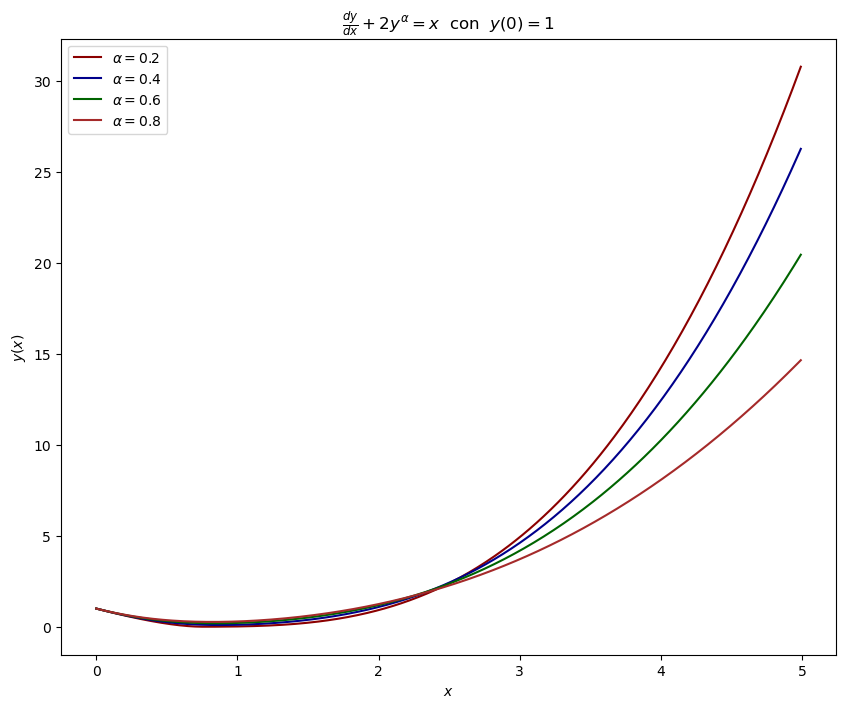

In [29]:
##Punto II
#Solución númerica
Solution2 = RK5(f2,1,5,0.01)
Solution3 = RK5(f3,1,5,0.01)
Solution4 = RK5(f4,1,5,0.01)
Solution5 = RK5(f5,1,5,0.01)
#Plot de las soluciones
plt.figure(figsize=(10,8))
plt.plot(Solution2[0],Solution2[1],color = "darkred", label = r"$\alpha=0.2$")
plt.plot(Solution3[0],Solution3[1],color = "darkblue", label = r"$\alpha=0.4$")
plt.plot(Solution4[0],Solution4[1],color = "darkgreen", label = r"$\alpha=0.6$")
plt.plot(Solution5[0],Solution5[1],color = "brown", label = r"$\alpha=0.8$")
plt.xlabel(r"$x$")
plt.ylabel(r"$y\left(x\right)$")
plt.title(r"$\frac{dy}{dx}+2y^{\alpha} = x$  con  $y(0)=1$")
plt.legend()
plt.show()